In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer

/Users/adityan/Work/ds_practice/ghse_ds_test/GHSE_Text_Summarization/venv/lib/python3.8/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
2024-07-17 13:00:37.263992: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
model = SentenceTransformer('bert-base-nli-mean-tokens')
model

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
)

In [12]:
sentences = [
"I love my country India"
,"I live in India"
,"Apple is the national fruit of India"
,"Apple is rich in vitamin A"
,"Eating Apple on daily basis is good for health"
]
embeddings = model.encode(sentences)
embeddings

array([[-0.20471212,  0.3319597 ,  1.2012188 , ...,  0.44695145,
         0.1149876 ,  0.05129397],
       [ 0.14131367, -0.24678297,  1.0356688 , ..., -0.06541099,
         0.20763727, -0.04001803],
       [-0.2375955 ,  0.6214306 , -0.49510902, ...,  0.5317888 ,
        -0.386791  , -0.5806119 ],
       [-0.18654546,  0.5419991 , -0.969819  , ...,  0.5631677 ,
        -0.21986255, -0.52161455],
       [-0.30061635,  0.31709722,  0.26477668, ...,  0.86597043,
        -0.19933774, -0.712669  ]], dtype=float32)

In [13]:
print(embeddings.shape)

(5, 768)


# Semantic Textual Similarity

In [14]:
from sentence_transformers.util import cos_sim

sim = np.zeros((len(sentences),len(sentences)))

for i in range(len(sentences)):
    sim[i:,i] = cos_sim(embeddings[i],embeddings[i:])

sim

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.57581508, 1.        , 0.        , 0.        , 0.        ],
       [0.44034564, 0.33607757, 1.        , 0.        , 0.        ],
       [0.40129125, 0.16179246, 0.73404264, 1.00000012, 0.        ],
       [0.47067195, 0.06559327, 0.58087248, 0.70577049, 1.        ]])

<Axes: >

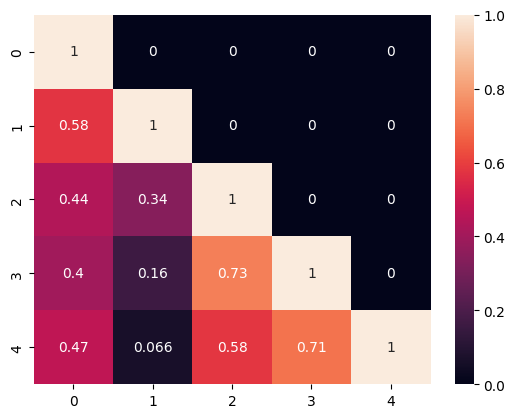

In [15]:
sns.heatmap(sim, annot=True)

In [16]:
model1 = SentenceTransformer("all-mpnet-base-v2")
model1

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

SentenceTransformer(
  (0): Transformer({'max_seq_length': 384, 'do_lower_case': False}) with Transformer model: MPNetModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

In [17]:
embeddings1 = model1.encode(sentences)
print(embeddings1.shape)

(5, 768)


In [18]:
sim1 = np.zeros((len(sentences),len(sentences)))

for i in range(len(sentences)):
    sim1[i:,i] = cos_sim(embeddings1[i],embeddings1[i:])

sim1

array([[1.00000012, 0.        , 0.        , 0.        , 0.        ],
       [0.32633597, 1.        , 0.        , 0.        , 0.        ],
       [0.40925175, 0.24493033, 1.        , 0.        , 0.        ],
       [0.12684186, 0.03628787, 0.57871449, 1.00000012, 0.        ],
       [0.13969132, 0.06337398, 0.59097004, 0.6936937 , 1.        ]])

<Axes: >

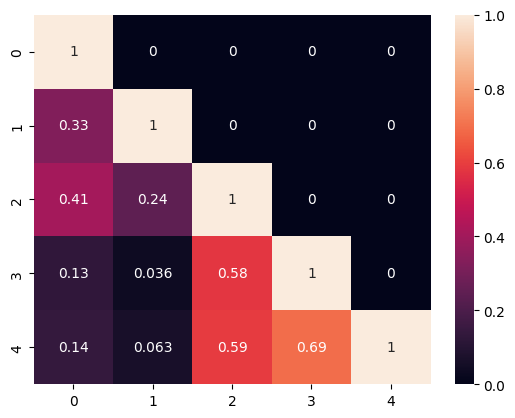

In [19]:
sns.heatmap(sim1, annot=True)